In [180]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests
import warnings
import openpyxl

# Scraping Data from `Ebay` (Keyboards Data)

In [ ]:
excel = openpyxl.Workbook()
sheet = excel.active
sheet.tilte = "Ebay Keyboards Data"
sheet.append(["Name","Condition","Price","Rating","Shipping_cost","Location","Orders","Seller"])
sheet

In [ ]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36","Accept-Encoding": "gzip, deflate, br","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7"}
r = requests.get("https://www.ebay.com/sch/i.html?_from=R40&_nkw=keyboards&_sacat=0&_pgn=18",headers=headers)

In [ ]:
soup = bs(r.content,'html.parser')

In [ ]:
keyboard = soup.find("div",id="srp-river-results").find_all("li")
print(keyboard)

In [ ]:
count = 0
for item in keyboard:
    try:
        name = item.find("div",class_="s-item__title").find("span",attrs={"role":"heading"}).get_text()
        count+=1
    except:
        print("CAn't get")
    try:
        condition = item.find("span",class_="SECONDARY_INFO").get_text()
    except:
        print("CAn't get")
    try:
        price = item.find("div",class_="s-item__details clearfix").find("span",class_="s-item__price").get_text().split(' ')[0]
    except:
        print("CAn't get")
    try:
        rating = item.find("span",class_="s-item__seller-info-text").get_text().split(" ")[2]
    except:
        print("CAn't get")
    try:
        orders = item.find("span",class_="s-item__seller-info-text").get_text().split(" ")[1].strip("()")
    except:
        print("CAn't get")
    try:
        seller = item.find("span",class_="s-item__seller-info-text").get_text().split(" ")[0]
    except:
        print("CAn't get")
    try:
        shipping_cost = item.find("span",class_="s-item__shipping s-item__logisticsCost").get_text().split(" ")[0]
    except:
        print("CAn't get")
    try:
        location = item.find("span",class_="s-item__location s-item__itemLocation").get_text().split(" ")[1]
    except:
        print("CAn't get")
    print(name,condition,price,rating,shipping_cost,location,orders,seller)
    sheet.append([name,condition,price,rating,shipping_cost,location,orders,seller])
    if(count>=60):
        break
excel.save("Ebay_Data1.xlsx")

In [16]:
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_excel('Ebay_Data1.xlsx')

In [32]:
type(df)

pandas.core.frame.DataFrame

In [33]:
df.dtypes

Name             object
Condition        object
Price            object
Rating           object
Shipping_cost    object
Location         object
Orders           object
Seller           object
dtype: object

In [ ]:
type(df)

## Cleaning `Price` Column

In [35]:
df['Price'] = df['Price'].str.replace('$','')

In [36]:
df.head()

,Name,Condition,Price,Rating,Shipping_cost,Location,Orders,Seller
0,2 x Universal UK Replacement Keyboard Stickers...,Brand New,4.73,99.6%,+$18.24,United,"2,026",offthekeyboard
1,UK English Black Keycap Stickers QWERTY Keyboa...,Brand New,2.30,99.6%,+$18.24,United,"2,026",offthekeyboard
2,Rii Mini X1 2.4G Wireless Mini Keyboard with ...,Brand New,15.29,99%,Free,China,"17,326",xsmartbuying
3,104 Pcs Mechanical Keyboard Keycaps Set OEM Ba...,Brand New,5.99,94.4%,+$3.00,China,413,baicaijaa
4,USB WIRED STYLISH SLIM QWERTY KEYBOARD UK LAYO...,Brand New,8.21,99.2%,+$45.01,United,"453,971",foido


In [41]:
df['Price'] = pd.to_numeric(df['Price'])
df['Price']

0       4.73
1       2.30
2      15.29
3       5.99
4       8.21
       ...  
955     3.03
956     8.22
957    24.33
958    14.99
959    17.95
Name: Price, Length: 960, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           960 non-null    object 
 1   Condition      960 non-null    object 
 2   Price          960 non-null    float64
 3   Rating         960 non-null    object 
 4   Shipping_cost  960 non-null    object 
 5   Location       960 non-null    object 
 6   Orders         960 non-null    object 
 7   Seller         960 non-null    object 
dtypes: float64(1), object(7)
memory usage: 60.1+ KB


In [44]:
df.describe()

,Price
count,960.000000
mean,34.301396
std,50.072692
min,1.500000
25%,9.950000
50%,19.990000
75%,39.992500
max,669.500000


In [45]:
df.shape

(960, 8)

In [46]:
df.head()

,Name,Condition,Price,Rating,Shipping_cost,Location,Orders,Seller
0,2 x Universal UK Replacement Keyboard Stickers...,Brand New,4.73,99.6%,+$18.24,United,"2,026",offthekeyboard
1,UK English Black Keycap Stickers QWERTY Keyboa...,Brand New,2.30,99.6%,+$18.24,United,"2,026",offthekeyboard
2,Rii Mini X1 2.4G Wireless Mini Keyboard with ...,Brand New,15.29,99%,Free,China,"17,326",xsmartbuying
3,104 Pcs Mechanical Keyboard Keycaps Set OEM Ba...,Brand New,5.99,94.4%,+$3.00,China,413,baicaijaa
4,USB WIRED STYLISH SLIM QWERTY KEYBOARD UK LAYO...,Brand New,8.21,99.2%,+$45.01,United,"453,971",foido


## Cleaning `Rating` Column

In [49]:
df['Rating'] = df['Rating'].str.replace('%','')
df['Rating']

0      99.6
1      99.6
2        99
3      94.4
4      99.2
       ... 
955    98.5
956    96.6
957    99.5
958     100
959    98.8
Name: Rating, Length: 960, dtype: object

In [53]:
df["Rating"] = pd.to_numeric(df["Rating"])

In [54]:
df.describe()

,Price,Rating
count,960.000000,960.000000
mean,34.301396,98.283750
std,50.072692,7.969708
min,1.500000,0.000000
25%,9.950000,98.500000
50%,19.990000,99.400000
75%,39.992500,100.000000
max,669.500000,100.000000


In [55]:
df.head()

,Name,Condition,Price,Rating,Shipping_cost,Location,Orders,Seller
0,2 x Universal UK Replacement Keyboard Stickers...,Brand New,4.73,99.6,+$18.24,United,"2,026",offthekeyboard
1,UK English Black Keycap Stickers QWERTY Keyboa...,Brand New,2.30,99.6,+$18.24,United,"2,026",offthekeyboard
2,Rii Mini X1 2.4G Wireless Mini Keyboard with ...,Brand New,15.29,99.0,Free,China,"17,326",xsmartbuying
3,104 Pcs Mechanical Keyboard Keycaps Set OEM Ba...,Brand New,5.99,94.4,+$3.00,China,413,baicaijaa
4,USB WIRED STYLISH SLIM QWERTY KEYBOARD UK LAYO...,Brand New,8.21,99.2,+$45.01,United,"453,971",foido


## Cleaning `Shipping_cost` Column

In [62]:
df['Shipping_cost'] = df['Shipping_cost'].str.replace('+','')

In [64]:
df['Shipping_cost'] = df['Shipping_cost'].str.replace('$','')
df['Shipping_cost']

0      18.24
1      18.24
2       Free
3       3.00
4      45.01
       ...  
955    38.60
956     0.08
957    80.29
958    79.71
959    25.87
Name: Shipping_cost, Length: 960, dtype: object

In [66]:
df['Shipping_cost'] = df['Shipping_cost'].str.replace('Free','0.00')
df['Shipping_cost']

0      18.24
1      18.24
2       0.00
3       3.00
4      45.01
       ...  
955    38.60
956     0.08
957    80.29
958    79.71
959    25.87
Name: Shipping_cost, Length: 960, dtype: object

In [68]:
df['Shipping_cost'] = df['Shipping_cost'].str.replace('Shipping','0.00')
df['Shipping_cost']

0      18.24
1      18.24
2       0.00
3       3.00
4      45.01
       ...  
955    38.60
956     0.08
957    80.29
958    79.71
959    25.87
Name: Shipping_cost, Length: 960, dtype: object

In [72]:
df['Shipping_cost'] = pd.to_numeric(df['Shipping_cost'])
df['Shipping_cost']

0      18.24
1      18.24
2       0.00
3       3.00
4      45.01
       ...  
955    38.60
956     0.08
957    80.29
958    79.71
959    25.87
Name: Shipping_cost, Length: 960, dtype: float64

In [73]:
df.describe()

,Price,Rating,Shipping_cost
count,960.000000,960.000000,960.000000
mean,34.301396,98.283750,34.046844
std,50.072692,7.969708,33.944657
min,1.500000,0.000000,0.000000
25%,9.950000,98.500000,4.810000
50%,19.990000,99.400000,26.050000
75%,39.992500,100.000000,58.830000
max,669.500000,100.000000,247.930000


In [74]:
df.head()

,Name,Condition,Price,Rating,Shipping_cost,Location,Orders,Seller
0,2 x Universal UK Replacement Keyboard Stickers...,Brand New,4.73,99.6,18.24,United,"2,026",offthekeyboard
1,UK English Black Keycap Stickers QWERTY Keyboa...,Brand New,2.30,99.6,18.24,United,"2,026",offthekeyboard
2,Rii Mini X1 2.4G Wireless Mini Keyboard with ...,Brand New,15.29,99.0,0.00,China,"17,326",xsmartbuying
3,104 Pcs Mechanical Keyboard Keycaps Set OEM Ba...,Brand New,5.99,94.4,3.00,China,413,baicaijaa
4,USB WIRED STYLISH SLIM QWERTY KEYBOARD UK LAYO...,Brand New,8.21,99.2,45.01,United,"453,971",foido


## Cleaning `Orders` Column

In [77]:
df['Orders'] = df['Orders'].str.replace(',','')
df['Orders']

0        2026
1        2026
2       17326
3         413
4      453971
        ...  
955      7831
956     63793
957       462
958      3400
959      5113
Name: Orders, Length: 960, dtype: object

In [79]:
df['Orders'] = pd.to_numeric(df['Orders'])
df['Orders']

0        2026
1        2026
2       17326
3         413
4      453971
        ...  
955      7831
956     63793
957       462
958      3400
959      5113
Name: Orders, Length: 960, dtype: int64

In [80]:
df.describe()

,Price,Rating,Shipping_cost,Orders
count,960.000000,960.000000,960.000000,960.000000
mean,34.301396,98.283750,34.046844,21854.989583
std,50.072692,7.969708,33.944657,72367.964787
min,1.500000,0.000000,0.000000,0.000000
25%,9.950000,98.500000,4.810000,370.000000
50%,19.990000,99.400000,26.050000,2026.000000
75%,39.992500,100.000000,58.830000,13588.000000
max,669.500000,100.000000,247.930000,978001.000000


# Analysing Data

## Sellers with most products

<Axes: >

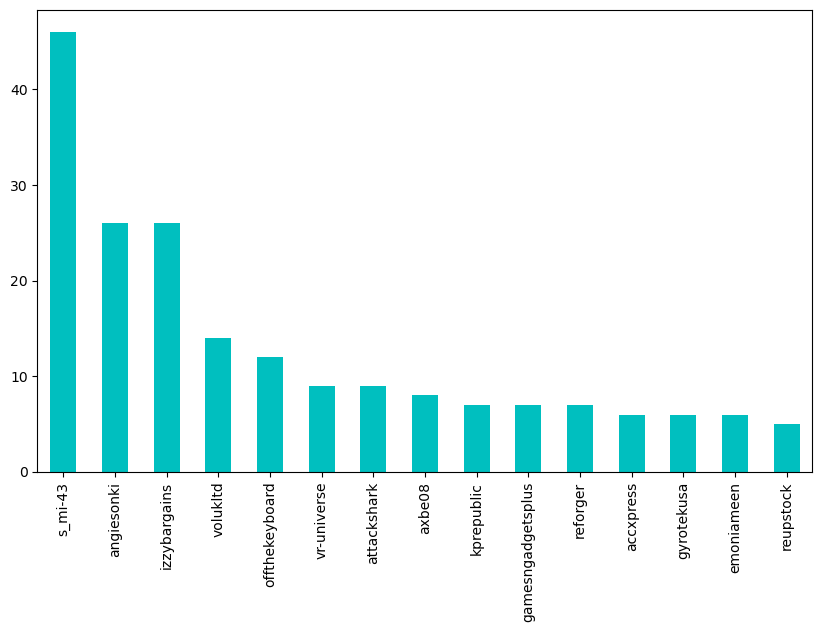

In [178]:
df['Seller'].value_counts()[:15].plot(kind='bar',color='c',figsize=(10,6))

## Country wise Products

<Axes: >

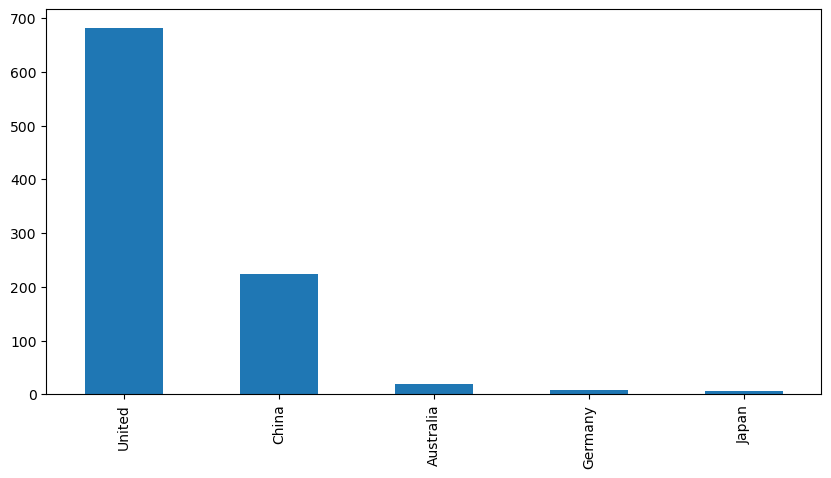

In [103]:
df['Location'].value_counts()[:5].plot(kind='bar',figsize=(10,5))

## Condition of Products

<Axes: >

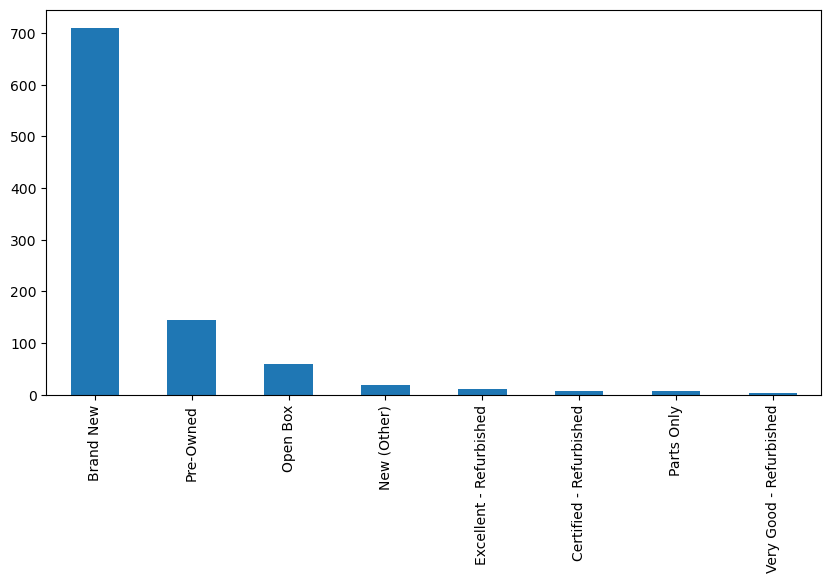

In [170]:
df['Condition'].value_counts().plot(kind='bar',figsize=(10,5))

## Products with 99%+ Ratings

In [173]:
x = df['Rating'].value_counts().sort_values(ascending=False)
x.head(7)

100.0    310
99.6      71
99.0      55
99.2      36
99.4      35
99.1      30
98.5      28
Name: Rating, dtype: int64

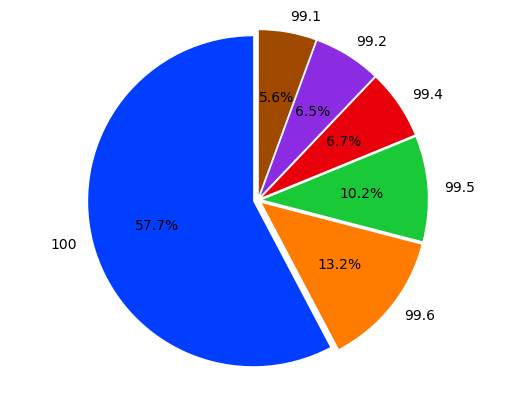

In [174]:
palette_color = sn.color_palette('bright')
explode = (0.03, 0.03, 0.03, 0.03,0.03,0.03)
plt.pie(x.head(6),explode=explode,colors=palette_color, labels = [100,99.6,99.5,99.4,99.2,99.1],
        autopct = '%1.1f%%',
        startangle = 90)
plt.axis('equal')
plt.show()

In [166]:
df.head()

,Name,Condition,Price,Rating,Shipping_cost,Location,Orders,Seller
0,2 x Universal UK Replacement Keyboard Stickers...,Brand New,4.73,99.6,18.24,United,2026,offthekeyboard
1,UK English Black Keycap Stickers QWERTY Keyboa...,Brand New,2.30,99.6,18.24,United,2026,offthekeyboard
2,Rii Mini X1 2.4G Wireless Mini Keyboard with ...,Brand New,15.29,99.0,0.00,China,17326,xsmartbuying
3,104 Pcs Mechanical Keyboard Keycaps Set OEM Ba...,Brand New,5.99,94.4,3.00,China,413,baicaijaa
4,USB WIRED STYLISH SLIM QWERTY KEYBOARD UK LAYO...,Brand New,8.21,99.2,45.01,United,453971,foido
